**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#**PART 1**:  Simple Linear Regression - Manual Calculation
In this part, you will perform a manual calculation of the coefficients used in a simple linear regression model for a given dataset.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.

-  **Step 1**:  For the input parameters (dataset) given in the cell below, create a scatter plot of Glucose level (y parameter) vs. Age (x parameter).
-  **Step 2**:  Calculate the coefficients for a simple linear regression model using the following equations:  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  

$$\widehat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2}
$$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 3**:  Create a scatter plot of the input dataset and generated regression line on the same plot.
-  **Step 4**:  Calculate the performance using R-squared using sklearn r2_score function (you may use the sklearn library for this step).
-  **Step 5**:  Confirm your calculated coefficients and R-squared performance metric using the embedded doctest module.  Record your regression equation - you will need to upload this to the accompanying assignment.
-  **Step 6**:  Reflect on the performance of your model.  What does the R-squared parameter tell you about the properties of this dataset and your simple linear prediction?  For example, is age a good predictor of glucose level?

<br>
Follow the instructions in the code cell to complete and test your code. You will replace all triple underscores (___) with your code.
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.

In [2]:
#Dataset Input Parameters
import numpy as np

Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])
print(np.ndim(Age))
print(np.size(Age))
#print(np.shape(Glucose))


1
14


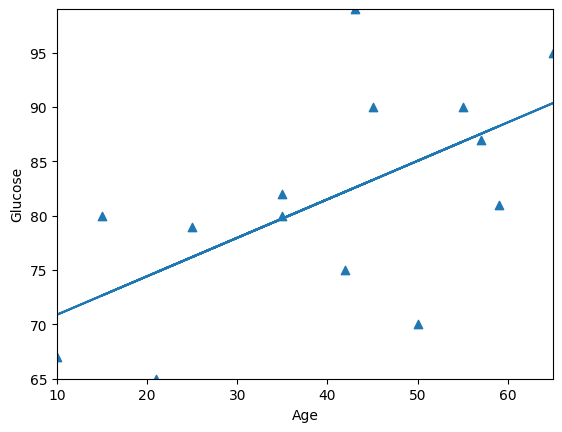

TestResults(failed=0, attempted=3)

In [6]:
#Simple Linear Regression - Manual Calculation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#Step 1:  Create a function which creates a scatter plot in Matplotlib.
#         Inputs:  x, y = data point coordinates
#                  point_marker = data point markers (see Matplotlib documentation for options)
#                  x_limit, y_limit = x, y axes min and max limits
#                  x_label, y_label = x, y axes tables
#         Return: plt reference
#         Do not "show" the plot in this function (you will do it later)
def plot_scatter(x, y, point_marker, x_limit, y_limit, x_label, y_label):
    #plt.figure()
    plt.scatter(x, y, marker=point_marker)  #create scatter plot
    plt.xlim(x_limit[0], x_limit[1])           #set x and y limits
    plt.ylim(y_limit[0], y_limit[1])
    plt.xlabel(x_label)          #set x and y labels
    plt.ylabel(y_label)
    return plt


#Step 2:  Create a function which MANALLY (using the equations) calculates the
#         coefficients for a simple linear regression model.
#         Your function must input numpy arrays for the x and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above.
#         NOTE - you may not use a model API for this step, calculate the parameters use the equations above.
#         return the tuple b0, b1 in this order
def simple_LR_coeffs_manual(X, Y):
    if X.size != Y.size:
       raise ValueError("X and Y shape doesn't match")

    if X.size==0 | Y.size==0:
       raise ValueError("Wrong data")
    
    if X.ndim >2 | Y.ndim >2:
       raise ValueError("Wrong dimension data")

    if Y.ndim==1 and Y.size>0:
       Y = Y.reshape(-1,1)
    
    if X.ndim==1 and X.size>0:
       X = X.reshape(-1,1)

    #add intercept term
    ones = np.ones((X.shape[0], 1))
    X_wI = np.concatenate((ones, X), axis=1)
    
    try:
      rst = np.linalg.inv(X_wI.T@X_wI)@(X_wI.T@Y)
      coeff_b0 = rst[0,0]
      coeff_b1 = rst[1,0]
    except np.linalg.LinAlgError as e:
       raise ValueError("Matix is singular.")
    
    return coeff_b0, coeff_b1

#Step 3:  Create a scatter plot of the input dataset and generated regression line (yhat = x*b1 + b0) on the same plot.
#         Hint:  To display both data and regression line on the same plot, call your plot function with the
#                original data then call it again with your predicted data, then "show" both.

#Call your manual coefficient function
b0, b1 = simple_LR_coeffs_manual(Age, Glucose)

#Calculate your prediction, yhat
yhat = b0+b1*Age

#Plot the data and prediction line on the same plot
plt1 = plot_scatter(Age, Glucose, '^', [Age.min(), Age.max()], [Glucose.min(),Glucose.max()], "Age", "Glucose")
plt.plot(Age,yhat)
plt1.show()



#Step 4:  Create a function which calculates the performance using R-squared using sklearn r2_score function.
#         Inputs:  y (actual values) and y_hat (predicted).
#         Return:  R-squared value
#         Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def R2_score(y, yhat):
  r2= 1 - np.sum((y-yhat)**2)/np.sum((y-np.mean(y))**2)
  return r2



#Step 5:  Run the doctest module.  DO NOT modify any code below this line!
import doctest
"""
  >>> print('b1:', round(simple_LR_coeffs_manual(Age, Glucose)[1], 3))
  b1: 0.354
  >>> print('b0:', round(simple_LR_coeffs_manual(Age, Glucose)[0], 3))
  b0: 67.348
  >>> print('r2:', round(R2_score(Glucose, yhat), 3))
  r2: 0.357
"""

doctest.testmod()

My reflection: Age might not be a very good predictor of glucose.

#**PART 2**:  Simple Linear Regression using Scikit learn

In this part, you will experiment with the functions used to train a simple linear regression model using the Scikit learn library.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Calculate the coefficients for a simple linear regression model using the appropriate sklearn functions (see the code below for hints).
-  **Step 2**:  Create a scatter plot of the input dataset and generated regression line on the same plot.
-  **Step 3**:  Calculate the performance using R-squared using sklearn r2_score function.
-  **Step 4**:  Run the cell and confirm the coefficients and R-squared using the embedded doctest module.  
-  **Step 5**:  Reflect on the performance of your model.  Confirm your outputs are the same as from Part 1, are they the same and should they be the same?

<br>
Follow the instructions in the code cell to complete and test your code. You will replace all triple underscores (___) with your code.
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.

[0.35391241]
[67.34791357]
[[82.56614702]
 [74.78007409]
 [76.19572372]
 [82.21223461]
 [87.5209207 ]
 [88.22874551]
 [79.73484777]
 [72.65659966]
 [86.81309589]
 [85.04353386]
 [90.35221994]
 [70.88703763]
 [83.27397183]
 [79.73484777]]


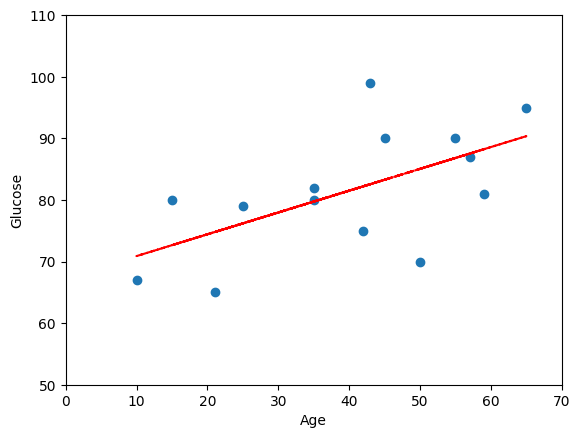

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print('b1:', simple_LR_coeffs_sklearn(Age_reshaped, Glucose_reshaped)[0][0])
Expected:
    b1: [0.35391241]
Got:
    b1: 0.3539124057393233
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print('b0:', simple_LR_coeffs_sklearn(Age_reshaped, Glucose_reshaped)[1][0])
Expected:
    b0: 67.34791357165692
Got:
    b0: 67.34791357165693
**********************************************************************
1 items had failures:
   2 of   3 in __main__
***Test Failed*** 2 failures.


TestResults(failed=2, attempted=3)

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#Step 1:  Create a function which calculates the coefficients for a simple linear regression model
#         Inputs: numpy arrays for the x and y variables
#         Return: coefficients b0, b1, and yhat (predicted output).
#         Your function MUST use sklearn functions.
#         Hint: Construct a linear regression object, then "fit" the data:
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#
#
def simple_LR_coeffs_sklearn(X, Y):
  # Return the tuple: b1, b0, yhat in this order
  lm = LinearRegression() #Construct sklearn linear regression object
  lm.fit(X, Y)            #Fit a line to the the data
  yhat = lm.predict(X)    #Generate a prediction for dep var X
  return lm.coef_[0], lm.intercept_, yhat #return b1, b0, yhat


#Step 2:  Run your sklearn simple linear regression function, then
#         call your scatter plot function from Part 1 to create a plot
#         with the input dataset and generated regression line on the same plot.
#         Hint: you will need to reshape Age, Glucose to column vectors for sklearn

#Reshape your inputs to column vectors for sklearn
Age_reshaped = Age.reshape(-1,1)
Glucose_reshaped = Glucose.reshape(-1,1)

#Call your simple LR sklearn function
coeffs, intercept, yhat = simple_LR_coeffs_sklearn(Age_reshaped, Glucose_reshaped)
print(coeffs)
print(intercept)
print(yhat)

def plot_line(x, y, line_style, x_limit, y_limit, x_label, y_label):
    plt.plot(x, y, line_style)
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


#Plot the data and regression line on the same plot
plt1 = plot_scatter(Age, Glucose, 'o', [0,70], [50,110], 'Age', 'Glucose')
plt2 = plot_line(Age, yhat, 'r--', [0,70], [50,110], 'Age', 'Glucose')
plt1.show()



#Step 3:  Calculate the performance using R-squared using sklearn r2_score function.
#         Call your function from Part 1
r2 = r2_score(Glucose, yhat)


#Step 4:  Run the doctest module.  DO NOT modify any code below this line!

import doctest
"""
  >>> print('b1:', simple_LR_coeffs_sklearn(Age_reshaped, Glucose_reshaped)[0][0])
  b1: [0.35391241]
  >>> print('b0:', simple_LR_coeffs_sklearn(Age_reshaped, Glucose_reshaped)[1][0])
  b0: 67.34791357165692
  >>> print('r2:', r2)
  r2: 0.35733001480762194
"""

doctest.testmod()

#**PART 3**: Multiple Linear Regression using Sklearn
In this part, you will train a multiple linear regression model using Pandas and the Scikit learn library and determine which independent variables have the greatest effect on the model performance.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.  The Multiple Linear Regression equation is shown here for reference:  

$$\hat y = b_0+b_1x_1+b_2x_2=B^T\cdot X$$   

Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Input the Stock Market dataset into a Pandas dataframe.
-  **Step 2**:  Examine the relationship between the variables
-  **Step 3**:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
-  **Step 4**:  Fit the regression model for ALL combinations of indep vars
-  **Step 5**:  Predict the stock index price using your top 2 models from the test cases shown in the code cell below (i.e. test your top 2 models with the best r2 scores).
-  **Step 6**: Record your regression equation - you will need to upload this to the accompanying assignment. Reflect on your results.  What combination of independent variables gave the best performing model?  Note that the more variable you use in your model, the more memory and processing resources you will need so does it make sense to use all of your independent variables if a subset is close in performance?

<br>
**Background on Gradient Descent**   
In Gradient Descent, we can use the MSE (Mean Squared Error) as our cost function then compute the partial derivatives with respect to each of the coefficients.  We will do the same here, but in a more generic form to support 'n' independent variables.  Here we expand the cost function for multiple independent variables and 'm' examples:

$$MSE = \frac{1}{m}\sum(y - \widehat y)^2 = \frac{1}{m}\sum(y - (b_0+b_1x_1+b_2x_2+...+b_nx_n))^2$$  
The gradients of each coefficient are defined as the partial derivatives of the cost function with respect to each of the coefficients.  

 $$\frac{\partial(MSE)}{\partial(b_0)} = \frac{1}{m}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-1) = -\frac{2}{m}\sum(y-\widehat y) $$

 $$\frac{\partial(MSE)}{\partial(b_1)} = \frac{1}{m}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-x_1) = -\frac{2}{m}\sum((y-\widehat y)*x_1) = -\frac{2}{m}(y-\widehat y)\cdot X_1 $$

 $$\frac{\partial(MSE)}{\partial(b_2)} = \frac{1}{m}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-x_2) = -\frac{2}{m}\sum((y-\widehat y)*x_2) = -\frac{2}{m}(y-\widehat y)\cdot X_2 $$
            <center>**. . .** </center>
            
 $$\frac{\partial(MSE)}{\partial(b_1)} = \frac{1}{n}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-x_m) = -\frac{2}{n}\sum((y-\widehat y)*x_m) = -\frac{2}{n}(y-\widehat y)\cdot X_m $$  

where the '*' represents an element by element multiply of the vectors, and the '$\cdot$' represents the dot product.   

Note that the $b_0$ coefficient is computed slightly different from the remaining coefficients in that all but the $b_0$ coefficient contains its corresponding independent variable term.

<br>
Follow the instructions in the code cell to complete and test your code. You will replace all triple underscores (___) with your code.
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.

In [15]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.8 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


              Year     Month  Interest_Rate  Unemployment_Rate        GDP  \
count    36.000000  36.00000      36.000000          36.000000  36.000000   
mean   2017.000000   6.50000       2.183333           5.891667  20.450000   
std       0.828079   3.50102       0.351308           0.175507   1.053565   
min    2016.000000   1.00000       1.600000           5.600000  18.700000   
25%    2016.000000   3.75000       1.892500           5.745000  19.575000   
50%    2017.000000   6.50000       2.185000           5.890000  20.450000   
75%    2018.000000   9.25000       2.477500           6.035000  21.325000   
max    2018.000000  12.00000       2.770000           6.180000  22.200000   

       Stock_Index_Price  
count          36.000000  
mean         1065.944444  
std           178.332746  
min           704.000000  
25%           955.750000  
50%          1054.500000  
75%          1180.000000  
max          1464.000000  

Output linear model intercept, coefficients, score


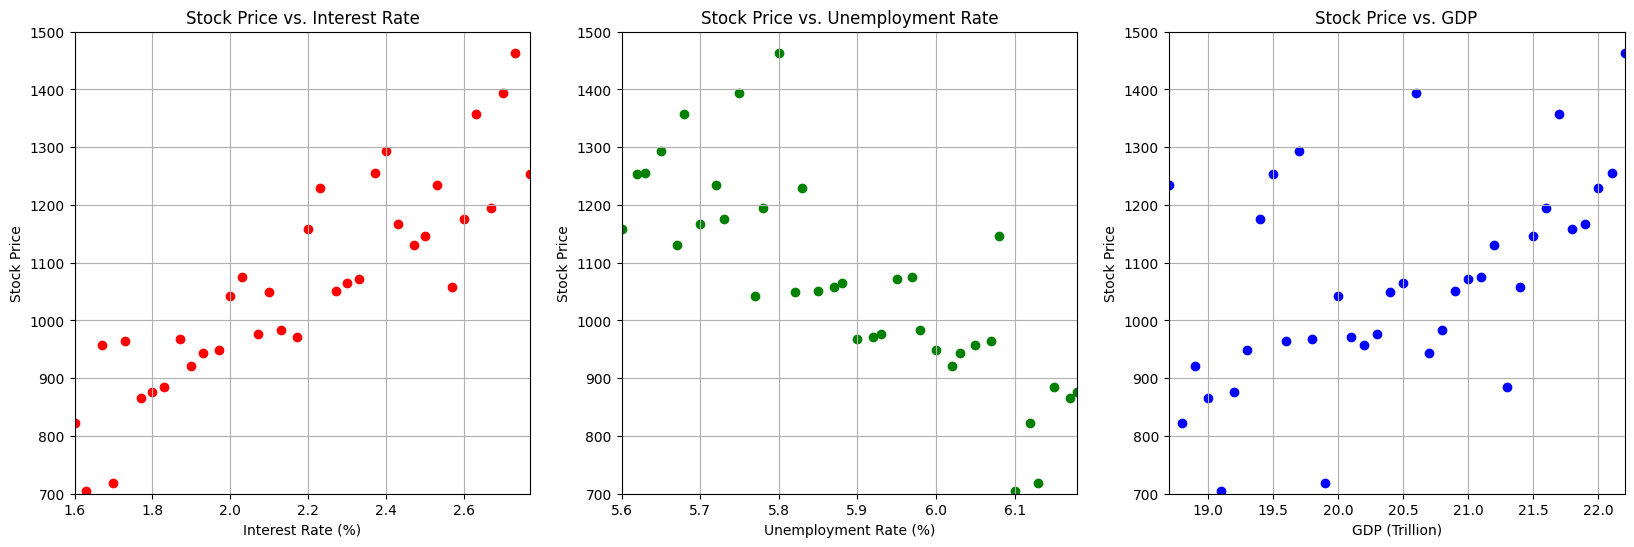

In [25]:
#Multiple Linear Regression
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,\
                         2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],\
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1],\
                'Interest_Rate':[2.73, 2.7,  2.63, 2.4,  2.37, 2.77, 2.53, 2.23, 2.67, 2.6,  2.43, 2.2,  2.5,  2.47,\
                                 2.03, 2.33, 2.3,  2.57, 2.27, 2.1,  2.,   2.13, 2.07, 2.17, 1.87, 1.73, 1.67, 1.97,\
                                 1.93, 1.9,  1.83, 1.8,  1.77, 1.6,  1.7,  1.63],\
                'Unemployment_Rate':[5.8,  5.75, 5.68, 5.65, 5.63, 5.62, 5.72, 5.83, 5.78, 5.73, 5.7,  5.6,  6.08, 5.67,\
                                     5.97, 5.95, 5.88, 5.87, 5.85, 5.82, 5.77, 5.98, 5.93, 5.92, 5.9,  6.07, 6.05, 6.,\
                                     6.03, 6.02, 6.15, 6.18, 6.17, 6.12, 6.13, 6.1],\
                'GDP':[22.2, 20.6, 21.7, 19.7, 22.1, 19.5, 18.7, 22.,  21.6, 19.4, 21.9, 21.8,\
                       21.5, 21.2, 21.1, 21.,  20.5, 21.4, 20.9, 20.4, 20.,  20.8, 20.3, 20.1,\
                       19.8, 19.6, 20.2, 19.3, 20.7, 18.9, 21.3, 19.2, 19.,  18.8, 19.9, 19.1],\
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1230,1195,1175,1167,1159,\
                                      1147,1130,1075,1071,1065,1058,1051,1049,1043, 984, 976, 971,\
                                       968, 965, 958, 949, 943, 922, 884, 876, 866, 822, 719, 704]
                }


#Step 1:  Input the Stock Market dataset into a Pandas dataframe.
#         Print out a description of the data.
#         Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df = DataFrame(Stock_Market)
print(df.describe())


#Step 2:  Examine the relationship between the variables.
#         No coding needed for this step.  You may use the code here or write your own function.
#         Plot each of the independent variables vs. Stock_Index_Price using Matplotlib
#         Which independent vars do you think will have the greatest impact on the dep variable?
fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax1[0].scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
ax1[0].set_title("Stock Price vs. Interest Rate")
ax1[0].set_xlabel("Interest Rate (%)")
ax1[0].set_ylabel("Stock Price")
ax1[0].grid(axis='both')
ax1[0].axhline(0, color='black')
ax1[0].axvline(0, color='black')
ax1[0].set_xlim([df['Interest_Rate'].min(),df['Interest_Rate'].max()])
ax1[0].set_ylim([700,1500])

ax1[1].scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
ax1[1].set_title("Stock Price vs. Unemployment Rate")
ax1[1].set_xlabel("Unemployment Rate (%)")
ax1[1].set_ylabel("Stock Price")
ax1[1].grid(axis='both')
ax1[1].axhline(0, color='black')
ax1[1].axvline(0, color='black')
ax1[1].set_xlim([df['Unemployment_Rate'].min(),df['Unemployment_Rate'].max()])
ax1[1].set_ylim([700,1500])

ax1[2].scatter(df['GDP'], df['Stock_Index_Price'], color='blue')
ax1[2].set_title("Stock Price vs. GDP")
ax1[2].set_xlabel("GDP (Trillion)")
ax1[2].set_ylabel("Stock Price")
ax1[2].grid(axis='both')
ax1[2].axhline(0, color='black')
ax1[2].axvline(0, color='black')
ax1[2].set_xlim([df['GDP'].min(),df['GDP'].max()])
ax1[2].set_ylim([700,1500])


#Step 3:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
#         Use sklearn to perform the MLR and determine the intercept and coefficents.
#         Inputs: X, Y for the indep variable and dependent variable respectively.
#         Return: intercept, coefficients, and score in this exact order.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def MLR_sklearn(X,Y):
  if isinstance(X, Series):
    X = X.to_numpy()

  if isinstance(Y, Series):
    Y = Y.to_numpy()

  #note: size = num of samples × number of features. In multiple regression, doesn't equal to num of samples
  #if X.size != Y.size:
      #raise ValueError("X and Y shape doesn't match")

  #use X.shape[0]
  if X.shape[0] != Y.shape[0]:
     raise ValueError("X and Y shape doesn't match")
  
  if X.size==0 | Y.size==0:
      raise ValueError("Wrong data")
    
  if X.ndim >2 | Y.ndim >2:
      raise ValueError("Wrong dimension data")

  if Y.ndim==1 and Y.size>0:
      Y = Y.reshape(-1,1)
    
  if X.ndim==1 and X.size>0:
      X = X.reshape(-1,1)

  regr = LinearRegression() #create a linear regression reference
  regr.fit(X,Y)                         #train your model
  yhat = regr.predict(X)  #Generate a predictions
  score = r2_score(Y,yhat)     #Generate r2 score (you make call the sklearn directly or use your function from Part 1)
  return regr.intercept_, regr.coef_[0], score #return intercept, coeffs, R2 score (in that order)


#Step 4:  Fit the regression model for ALL combinations of indep vars
#         Call the function you created in Step 3.
#         Print out the intercept, coefficients and r2 score for each of the cases.
#         Hint:  Extract the X parameter from the dataframe.
#         Hint:  The Y parameter will be Stock_Index_Price for all cases.
#Case 1:  Interest Rate only
#Case 2:  Unemployment Rate only
#Case 3:  GDP only
#Case 4:  Interest Rate + Unemployment Rate
#Case 5:  Interest Rate + GDP
#Case 6:  Unemployment Rate + GDP
#Case 7:  Interest Rate + Unemployment Rate + GDP


# write into log
with open("rst.txt","w") as f:

  print('\nOutput linear model intercept, coefficients, score')
  Y = df['Stock_Index_Price'] #dependent var

  #Case 1:  Interest Rate only
  print('Case 1:  Interest Rate only:', file=f)
  X1 = df['Interest_Rate'] #extract interest rate from the dataframe as the indep variables
  X1out = MLR_sklearn(X1,Y)  #call your MLR function
  print(X1out[0],' ', X1out[1], ' ', X1out[2], '\n', file=f)

  #Case 2:  Unemployment Rate only
  print('Case 2:  Unemployment Rate only:', file=f)
  X2 = df['Unemployment_Rate'] #extract unemployment rate from the dataframe as the indep variable
  X2out = MLR_sklearn(X2,Y)
  print(X2out[0],' ', X2out[1], ' ', X2out[2], '\n', file=f)

  #Case 3:  GDP only
  print('Case 3:  GDP only:',file=f)
  X3 = df['GDP']            #extract GDP
  X3out = MLR_sklearn(X3,Y)
  print(X3out[0],' ', X3out[1], ' ', X3out[2], '\n', file=f)

  #Case 4:  Interest Rate + Unemployment Rate
  print('Case 4:  Interest Rate + Unemployment Rate:', file=f)
  X4 = df[['Interest_Rate','Unemployment_Rate']] #extract both interest rate and unemployment rate
  X4out = MLR_sklearn(X4,Y)
  print(X4out[0],' ', X4out[1], ' ', X4out[2], '\n', file=f)

  #Case 5:  Interest Rate + GDP
  print('Case 5:  Interest Rate + GDP:', file=f)
  X5 = df[['Interest_Rate','GDP']] #extract both interest rate and GDP
  X5out = MLR_sklearn(X5,Y)
  print(X5out[0],' ', X5out[1], ' ', X5out[2], '\n', file=f)

  #Case 6:  Unemployment Rate + GDP
  print('Case 6:  Unemployment Rate + GDP:', file=f)
  X6 = df[['Unemployment_Rate', 'GDP']] #extract both unemployment rate and GDP
  X6out = MLR_sklearn(X6,Y)
  print(X6out[0],' ', X6out[1], ' ', X6out[2], '\n', file=f)

  #Case 7:  Interest Rate + Unemployment Rate + GDP
  print('Case 7:  Interest Rate + Unemployment Rate + GDP:', file=f)
  X7 = df[['Interest_Rate', 'Unemployment_Rate', 'GDP']] #extract interest rate, unemployment rate, GDP
  X7out = MLR_sklearn(X7, Y)
  print(X7out[0],' ', X7out[1], ' ', X7out[2], '\n', file=f)



#Step 5:  Predict the stock index price using your top 2 models with the following test cases (i.e. the top 2 models with the best r2 scores):
#         You should regenerate your model in case it was overwritten in the previous step when testing the other conditions.
#         Set the values for each of the independent variables, then call the sklearn predict function.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Test case 1:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.75
#                       New_Unemployment_Rate = 5.3
#                       New_GDP = 20.0
#         Test case 2:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.9
#                       New_Unemployment_Rate = 5.9
#                       New_GDP = 21.0
# NOTE - ___*
# HINT - the top 2 models should be Case 7 and then Case 4


#Reflections
Reflect on your findings from Part 3   

For case 1:
$$

$$